In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import datetime as dt
from pandas.plotting import lag_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [8]:
df = pd.read_csv('Microsoft_data_sets.csv')
# print(df)
df.head(100)

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2000,58.68750,59.31250,56.00000,58.28125,36.361576,53228400
1,04-01-2000,56.78125,58.56250,56.12500,56.31250,35.133263,54119000
2,05-01-2000,55.56250,58.18750,54.68750,56.90625,35.503712,64059600
3,06-01-2000,56.09375,56.93750,54.18750,55.00000,34.314400,54976600
4,07-01-2000,54.31250,56.12500,53.65625,55.71875,34.762833,62013600
...,...,...,...,...,...,...,...
95,18-05-2000,34.03125,34.03125,32.93750,33.09375,20.647133,53640400
96,19-05-2000,32.68750,32.96875,32.25000,32.53125,20.296190,66578000
97,22-05-2000,32.56250,32.62500,31.21875,32.09375,20.023235,69955000
98,23-05-2000,31.93750,32.78125,31.53125,31.59375,19.711287,57963200


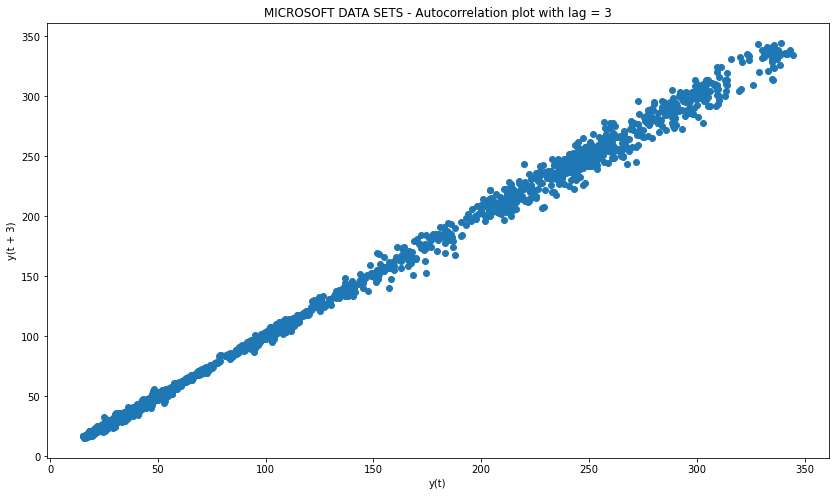

In [9]:
#code to check auto correlation
plt.figure(figsize = (14,8))
lag_plot(df['Open'], lag=3)
plt.title('MICROSOFT DATA SETS - Autocorrelation plot with lag = 3')

plt.show()

#(There is auto-correlation in the data).
#We can now confirm that ARIMA is going to be a good model to be applied to this type of data

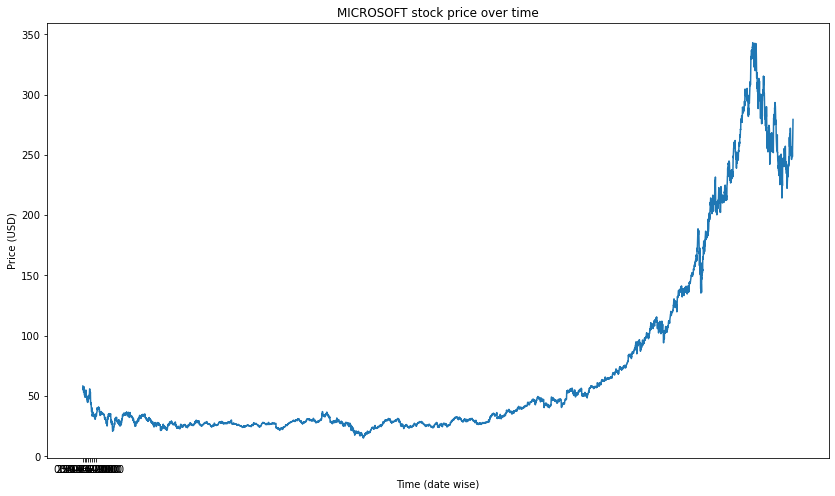

In [10]:

plt.figure(figsize = (14,8))
plt.plot(df["Date"], df["Close"])
plt.xticks(np.arange(0,110, 15), df['Date'][0:110:15])
plt.title("MICROSOFT stock price over time")
plt.xlabel("Time (date wise)")
plt.ylabel("Price (USD)")

plt.show()


In [11]:
# For this we select the following ARIMA parameters: p=4, d=1 and q=0.
#training 100 rows, test 10 rows
data_train, data_test = df[0:100], df[100:110]
training_data = data_train['Close'].values
data_test = data_test['Close'].values
history = [x for x in training_data]
model_predictions = []
N_observations_test = len(data_test)
for time_point in range(N_observations_test):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = data_test[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(data_test, model_predictions)
print('MEAN SQUARE ERROR FOR TESTING is {}'.format(MSE_error))

C:\Users\uday\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


MEAN SQUARE ERROR FOR TESTING is 1.4288459213789857


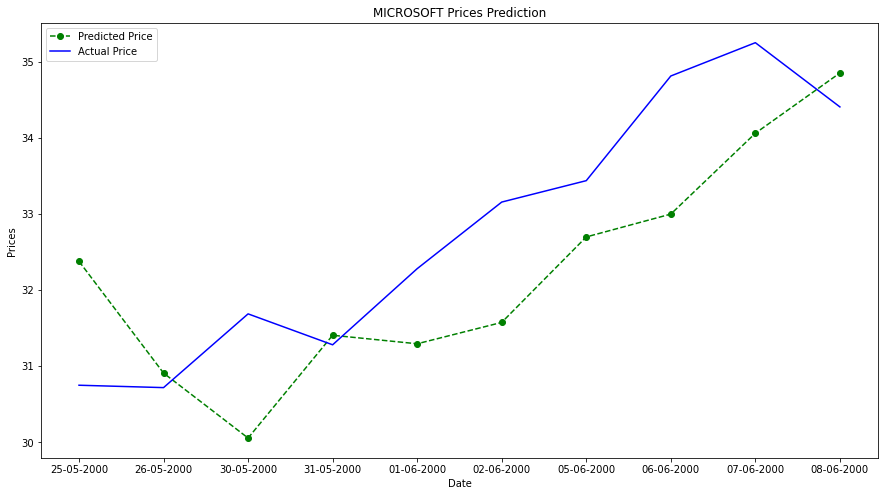

In [12]:

# Let’s visualize the predictions to understand the performance of the model more.

test_set_range = df[100:110].index
plt.figure(figsize = (15,8))
plt.plot(test_set_range, model_predictions, color='green', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, data_test, color='blue', label='Actual Price')
plt.title('MICROSOFT Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')

plt.xticks(np.arange(100,110,1), df.Date[100:110:1])
plt.legend()
# plt.xticks(np.arange(4672,5840,1167), df.Date[4672:5840:1167])
plt.show()